In [1]:
# Import library untuk membaca file yang akan kita gunakan sebagai bahan analisa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Membaca file
data_penjualan = pd.read_excel("C:\\Users\\Anteraja\\Documents\\Data_dummy_clean.xlsx")
data_penjualan.head()

,tanggal_penjualan,nama_cabang,target_harian,total_sales,produk_tidak_terjual_kemarin,produk_masuk,total_produk_tidak_terjual_today,total_produk_terjual_today,target_yn,harga_produk,total_pendapatan,fee_sales_per_produk_terjual,fee_sales,fee_per_sales,pendapatan_bersih_cabang
0,1 Agu 2022,A1,77,8,0,218,1,217,Y,10000,2170000,2000,434000,54250.000000,1736000
1,1 Agu 2022,A2,73,3,9,44,4,49,N,10000,490000,2000,98000,32666.666667,392000
2,1 Agu 2022,A3,75,5,30,143,27,146,Y,10000,1460000,2000,292000,58400.000000,1168000
3,1 Agu 2022,A4,76,12,192,427,59,560,Y,10000,5600000,2000,1120000,93333.333333,4480000
4,1 Agu 2022,A5,74,3,1,72,0,73,N,10000,730000,2000,146000,48666.666667,584000


In [3]:
# Cek info data 
data_penjualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   tanggal_penjualan                 175 non-null    object 
 1   nama_cabang                       175 non-null    object 
 2   target_harian                     175 non-null    int64  
 3   total_sales                       175 non-null    int64  
 4   produk_tidak_terjual_kemarin      175 non-null    int64  
 5   produk_masuk                      175 non-null    int64  
 6   total_produk_tidak_terjual_today  175 non-null    int64  
 7   total_produk_terjual_today        175 non-null    int64  
 8   target_yn                         175 non-null    object 
 9   harga_produk                      175 non-null    int64  
 10  total_pendapatan                  175 non-null    int64  
 11  fee_sales_per_produk_terjual      175 non-null    int64  
 12  fee_sale

In [4]:
# Cek data untuk mengetahui apakah ada nilai yang tidak terbaca atau null 
data_penjualan.isnull().sum()

tanggal_penjualan                   0
nama_cabang                         0
target_harian                       0
total_sales                         0
produk_tidak_terjual_kemarin        0
produk_masuk                        0
total_produk_tidak_terjual_today    0
total_produk_terjual_today          0
target_yn                           0
harga_produk                        0
total_pendapatan                    0
fee_sales_per_produk_terjual        0
fee_sales                           0
fee_per_sales                       0
pendapatan_bersih_cabang            0
dtype: int64

In [5]:
# kita ingin mengetahui nama-nama dari kolom data
data_penjualan.columns

Index(['tanggal_penjualan', 'nama_cabang', 'target_harian', 'total_sales',
       'produk_tidak_terjual_kemarin', 'produk_masuk',
       'total_produk_tidak_terjual_today', 'total_produk_terjual_today',
       'target_yn', 'harga_produk', 'total_pendapatan',
       'fee_sales_per_produk_terjual', 'fee_sales', 'fee_per_sales',
       'pendapatan_bersih_cabang'],
      dtype='object')

In [6]:
data_penjualan.dtypes

tanggal_penjualan                    object
nama_cabang                          object
target_harian                         int64
total_sales                           int64
produk_tidak_terjual_kemarin          int64
produk_masuk                          int64
total_produk_tidak_terjual_today      int64
total_produk_terjual_today            int64
target_yn                            object
harga_produk                          int64
total_pendapatan                      int64
fee_sales_per_produk_terjual          int64
fee_sales                             int64
fee_per_sales                       float64
pendapatan_bersih_cabang              int64
dtype: object

NEXT.. LET'S BEGIN TO EXPLORATORY DATA ANALYSIS
Statistik deskriptif tentang mendeskripsikan dan menyederhanakan suatu data. Dalam statistik deskriptif menggunakan dua pendekatan :
1. Pendekatan kuantitatif dengan mendeskripsikan dan membuat summary data numerik.
2. Pendekatan visual dengan mengilustrasikan data menggunakan chart, plot, histogram, dan visual grafis lainnya.

*Poin terpenting dalam EDA yaitu curiosity atau rasa ingin tau yang tinggi. Sehingga melakukan list down pertanyaan akan mempermudah proses EDA.

5 Pertanyaan yang ingin kita ketahui :
1. Berapa rata-rata produk terjual ?
2. pada tanggal berapa pendapatan tertinggi didapatkan ?
3. Cek range tanggal penjualan, tampilkan table jumlah transaksi harian, lalu pada tanggal berapa penjualan terbanyak?
4. Cabang mana yang memiliki penjualan terbanyak ?
5. Cabang mana yang memiliki penjualan paling rendah ?

In [7]:
data_penjualan.head()

,tanggal_penjualan,nama_cabang,target_harian,total_sales,produk_tidak_terjual_kemarin,produk_masuk,total_produk_tidak_terjual_today,total_produk_terjual_today,target_yn,harga_produk,total_pendapatan,fee_sales_per_produk_terjual,fee_sales,fee_per_sales,pendapatan_bersih_cabang
0,1 Agu 2022,A1,77,8,0,218,1,217,Y,10000,2170000,2000,434000,54250.000000,1736000
1,1 Agu 2022,A2,73,3,9,44,4,49,N,10000,490000,2000,98000,32666.666667,392000
2,1 Agu 2022,A3,75,5,30,143,27,146,Y,10000,1460000,2000,292000,58400.000000,1168000
3,1 Agu 2022,A4,76,12,192,427,59,560,Y,10000,5600000,2000,1120000,93333.333333,4480000
4,1 Agu 2022,A5,74,3,1,72,0,73,N,10000,730000,2000,146000,48666.666667,584000


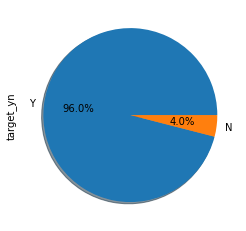

In [8]:
# persentase target dari cabang
data_penjualan['target_yn'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

Target pencapaian selama 1 week sebesar 96%.

1. Berapa rata-rata produk terjual ?

In [9]:
data_penjualan['total_produk_terjual_today'].describe()

count     175.000000
mean      451.514286
std       319.329143
min        20.000000
25%       150.500000
50%       395.000000
75%       659.500000
max      1208.000000
Name: total_produk_terjual_today, dtype: float64

In [10]:
#Another Insight (rataan produk terjual dimasing-masing store)
data_penjualan_group_produk_terjual = data_penjualan.groupby('nama_cabang')['total_produk_terjual_today'].mean().reset_index()

In [11]:
data_penjualan_group_produk_terjual

,nama_cabang,total_produk_terjual_today
0,A1,314.285714
1,A10,747.714286
2,A11,690.285714
3,A12,737.000000
4,A13,812.142857
5,A14,827.714286
6,A15,732.714286
7,A16,575.142857
8,A17,591.857143
9,A18,501.000000


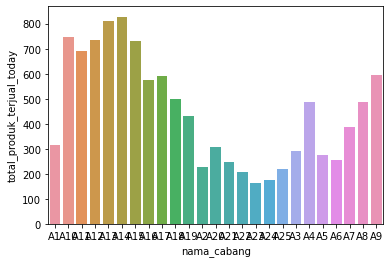

In [12]:
sns.barplot(x="nama_cabang", y="total_produk_terjual_today",data=data_penjualan_group_produk_terjual)
plt.show()

In [13]:
Dari insight yang didapat, bahwa rata-rata penjualan adalah 451.514286, 
dan rata-rata cabang dengan penjualan terbanyak di cabang A14 dengan mean sebesar 827.714286

SyntaxError: invalid syntax (1762400101.py, line 1)

2. pada tanggal berapa pendapatan tertinggi didapatkan ?

In [14]:
# Langkah 1. Mengelompokkan transaksi berdasarkan tanggal
data_pendapatan = data_penjualan.groupby('tanggal_penjualan')['pendapatan_bersih_cabang'].sum()
data_pendapatan

tanggal_penjualan
1 Agu 2022     60200000
2 Agu 2022     98240000
3 Agu 2022    105056000
4 Agu 2022    105800000
5 Agu 2022    111384000
6 Agu 2022     85200000
7 Agu 2022     66240000
Name: pendapatan_bersih_cabang, dtype: int64

In [15]:
# Langkah 2. Mengurutkan nilai 
data_pendapatan.sort_values(ascending = False)

tanggal_penjualan
5 Agu 2022    111384000
4 Agu 2022    105800000
3 Agu 2022    105056000
2 Agu 2022     98240000
6 Agu 2022     85200000
7 Agu 2022     66240000
1 Agu 2022     60200000
Name: pendapatan_bersih_cabang, dtype: int64

In [16]:
data_pendapatan = data_pendapatan.reset_index()
data_pendapatan.rename(columns={'pendapatan_bersih_cabang':'pendapatan_terbanyak'},inplace=True)
data_pendapatan

,tanggal_penjualan,pendapatan_terbanyak
0,1 Agu 2022,60200000
1,2 Agu 2022,98240000
2,3 Agu 2022,105056000
3,4 Agu 2022,105800000
4,5 Agu 2022,111384000
5,6 Agu 2022,85200000
6,7 Agu 2022,66240000


In [17]:
# Cek tipe data
data_pendapatan.dtypes

tanggal_penjualan       object
pendapatan_terbanyak     int64
dtype: object

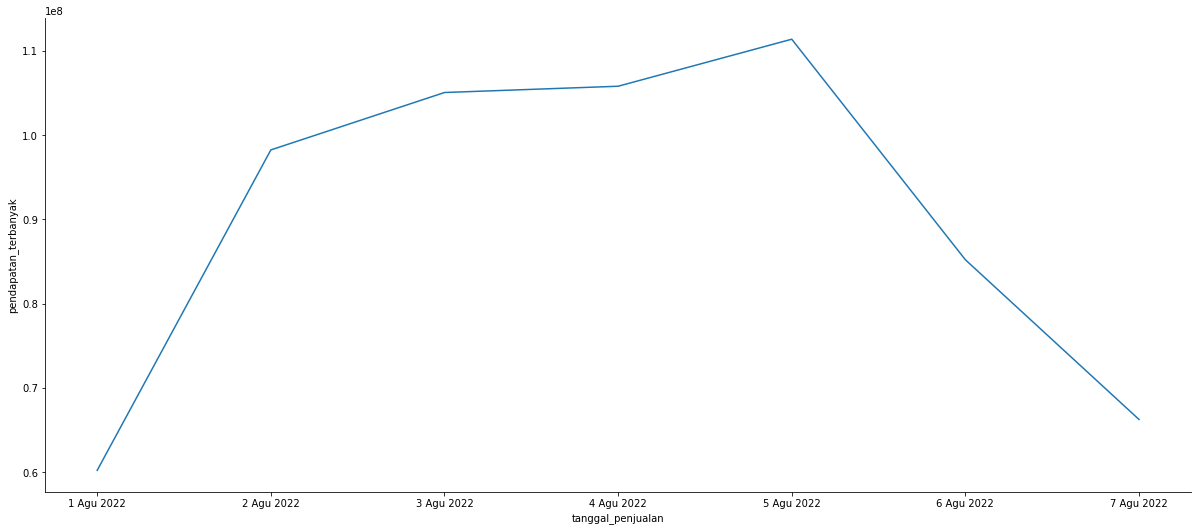

In [18]:
# Plot
g=sns.relplot(x="tanggal_penjualan", y="pendapatan_terbanyak", kind="line", data=data_pendapatan)
g.fig.set_size_inches(20,8)

Line chart menunjukkan pendapatan tertinggi pada tanggal 5 agustus dengan total pendapatan bersih sebanyak Rp.111.384.000 rupiah.

3. Karena pendapatan terbesar terjadi pada tanggal 5 agustus, kita cek range tanggal penjualan, tampilkan table jumlah transaksi harian, lalu pada tanggal tersebut berapa total penjualan nya ?

In [19]:
# Langkah 1. Mengelompokkan total produk terjual berdasarkan tanggal
data_harian = data_penjualan.groupby('tanggal_penjualan')['total_produk_terjual_today'].sum()
data_harian

tanggal_penjualan
1 Agu 2022     7525
2 Agu 2022    12280
3 Agu 2022    13132
4 Agu 2022    13225
5 Agu 2022    13923
6 Agu 2022    10650
7 Agu 2022     8280
Name: total_produk_terjual_today, dtype: int64

In [20]:
data_harian = data_harian.reset_index()
data_harian.rename(columns={'total_produk_terjual_today':'produk_terjual_summary'},inplace=True)
data_harian

,tanggal_penjualan,produk_terjual_summary
0,1 Agu 2022,7525
1,2 Agu 2022,12280
2,3 Agu 2022,13132
3,4 Agu 2022,13225
4,5 Agu 2022,13923
5,6 Agu 2022,10650
6,7 Agu 2022,8280


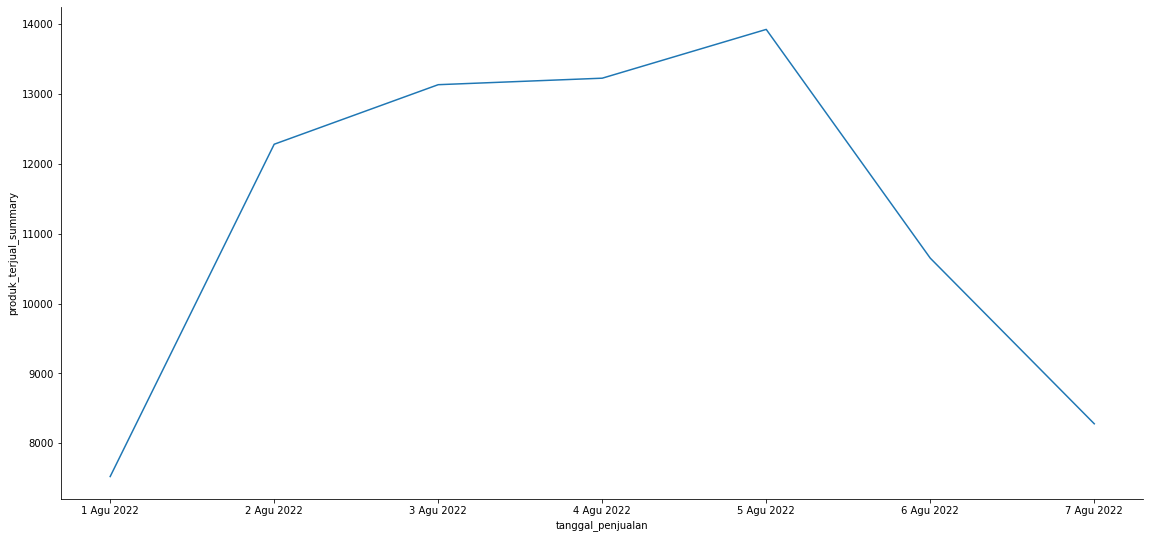

In [21]:
# Plot
g=sns.relplot(x="tanggal_penjualan", y="produk_terjual_summary", kind="line", data=data_harian)
g.fig.set_size_inches(20,8)

Dari grafik line chart terlihat produk terjual paling banyak pada tanggal 5 agustus sebesar 13923 produk.

4. Cabang mana yang memiliki penjualan terbanyak ? 

In [22]:
# Mengelompokkan cabang dengan penjualan terbanyak
data_cabang = data_penjualan.groupby('nama_cabang')['total_produk_terjual_today'].sum()
data_cabang

nama_cabang
A1     2200
A10    5234
A11    4832
A12    5159
A13    5685
A14    5794
A15    5129
A16    4026
A17    4143
A18    3507
A19    3007
A2     1586
A20    2163
A21    1725
A22    1459
A23    1156
A24    1224
A25    1535
A3     2042
A4     3407
A5     1917
A6     1786
A7     2712
A8     3421
A9     4166
Name: total_produk_terjual_today, dtype: int64

In [23]:
data_cabang = data_cabang.reset_index()
data_cabang.rename(columns={'total_produk_terjual_today':'produk_terjual_summary'},inplace=True)
data_cabang

,nama_cabang,produk_terjual_summary
0,A1,2200
1,A10,5234
2,A11,4832
3,A12,5159
4,A13,5685
5,A14,5794
6,A15,5129
7,A16,4026
8,A17,4143
9,A18,3507


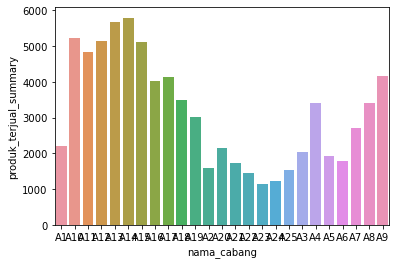

In [24]:
sns.barplot(x="nama_cabang", y="produk_terjual_summary", data=data_cabang)
plt.show()

Pada hasil visualisasi terlihat bahwa, cabang dengan penjualan terbanyak adalah di cabang A14 dengan total produk terjual sebanyak 5794.

5. Cabang yang memiliki penjualan terendah ?

In [25]:
# Langkah 1. Mengelompokkan transaksi berdasarkan cabang sama seperti langkah sebelumnya, tetapi kita ganti sum dengan min
data_cabang = data_penjualan.groupby('nama_cabang')['total_produk_terjual_today'].min()
data_cabang

nama_cabang
A1     129
A10    115
A11    262
A12    353
A13    538
A14    537
A15    355
A16    142
A17    246
A18    218
A19    176
A2      49
A20     73
A21     74
A22     76
A23     47
A24     61
A25     20
A3      75
A4     131
A5      73
A6     111
A7      47
A8     141
A9     105
Name: total_produk_terjual_today, dtype: int64

In [26]:
data_cabang = data_cabang.reset_index()
data_cabang.rename(columns={'total_produk_terjual_today':'produk_terjual_terendah'},inplace=True)
data_cabang

,nama_cabang,produk_terjual_terendah
0,A1,129
1,A10,115
2,A11,262
3,A12,353
4,A13,538
5,A14,537
6,A15,355
7,A16,142
8,A17,246
9,A18,218


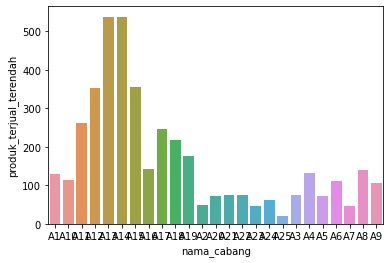

In [27]:
sns.barplot(x="nama_cabang", y="produk_terjual_terendah", data=data_cabang)
plt.show()

Dari grafik cabang dengan penjualan terendah yaitu pada cabang A25 dengan total penjualan 20 produk, hal ini terjadi karena cabang A25 merupakan anak cabang yang baru saja launcing di wilayah tersebut.
Saran : Buat trust ke masyarakat pada wilayah tersebut agar mereka mau membeli produk kita. dengan cara meningkatkan promosi dan edukasi tentang manfaat produk kita.